In [1]:
from KT_model import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A_KT_model = KT_based_model(wu=100, N1=1024)

*set up axes*

In [4]:
# set up the w (rad/s) axis
w_axis = np.linspace(0, A_KT_model.wu, 1024)

**set up the t axis of the output realization**

> This depends on some properties of the output realization
>
> e.g. sampling rate and duration

In [5]:
# t_axis = np.arange(0, 30, 0.1)

print("the shape of the time axis:", A_KT_model.t_axis_simu.shape)

the shape of the time axis: (3200,)


#### step-by-step implementation 

In [ ]:
a_KT_spectrum = KT_based_model.parameterized_KT_model(w_axis)

In [ ]:
type(a_KT_spectrum)

In [ ]:
plt.plot(w_axis, a_KT_spectrum)
plt.title('base KT model')
plt.show()

In [ ]:
gt = KT_based_model.Envelop_tfunc(t_axis)
gt2 = gt**2

In [ ]:
plt.plot(t_axis, gt)
plt.title('Envelop function')
plt.show()

In [ ]:

# create a separable S(w,t)

S_matrix = np.outer(a_KT_spectrum, gt2)

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
# X, Y = np.meshgrid(w_axis, t)
# Z = S_matrix
ax.plot_surface(w_axis[:, None], t_axis[None, :], S_matrix)
ax.view_init(20, 180)

#### Shortened implementation

Recall what we've done:
1. create the `w_axis` and `t_axis`;
2. create the separable spectrum;
3. generate simulations

In [6]:
Sww = which_PSD_model(KT_based_model.parameterized_KT_model, w_axis)

In [7]:
Sww.shape

(1024,)

In [8]:
a_KT_simu = A_KT_model.SpecRepsentation(Sww)

the lower limit of sampling frequency: 32
the length of the simulation (3200,)


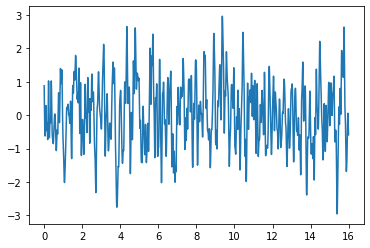

In [9]:
plt.plot(A_KT_model.t_axis_simu, a_KT_simu)
plt.show()

In [ ]:
S_nonsta_spectra = KT_based_model.nonsta_model(w_axis, A_KT_model.t_axis_simu)

In [ ]:
S_nonsta_spectra.shape

In [ ]:
a_simu = SpecRepsentation()

In [ ]:
np.random.seed(9527)
wu = 100
w_kt = np.linspace(-wu, wu, 1000)
KT_model = parameterize_KT_model(w_kt)

In [ ]:
plt.plot(w_kt, KT_model)
plt.show()

In [ ]:
# set up a Fs=50, for example
FS=100

# length of the simulated signal, in seconds
DURATION = 16

# return our simulated signal
t, simulation = SpecRepsentation(FS, DURATION)

In [ ]:
plt.plot(t, simulation)